# Visualize Birth Death Rates For a Given Folder
Tim Tyree<br>
8.12.2020

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

#automate the boring stuff
# from IPython import utils
import time, os, sys, re
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()
    
#load the libraries
from lib import *

%autocall 1
%load_ext autoreload
%autoreload 2

100000
Automatic calling is: Smart


# combine all of the relevant files in a given folder into one .csv

In [2]:
#find file interactively
print("please select a file from within the desired folder.")
file = search_for_file()

please select a file from within the desired folder.
File: /Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-1/ds_5_param_set_8/birth-death-rates/ic_200x200.117.21_ds_5_sigma_1.5_threshold_0.6_sr_50_mem_2_tmin_100_LT_2_bdrates.csv


In [4]:
#9 samples LT = 0
# file =  '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/ds_5_param_set_8/birth-death-rates/33_ds_5_sigma_1.5_threshold_0.6__traj_sr_40_mem_2_bdrates.csv'

#>60 samples LT = 2
file = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-1/ds_5_param_set_8/birth-death-rates/ic_200x200.117.21_ds_5_sigma_1.5_threshold_0.6_sr_50_mem_2_tmin_100_LT_2_bdrates.csv'
#change to the directory containing file
folder_name = os.path.dirname(file)
os.chdir(folder_name)

#find folder interactively. Crashes jupyter's root kernel :(
# from tkinter import Tk
# from tkinter.filedialog import askdirectory
# path = askdirectory(title='Select Folder') # shows dialog box and return the path
# print(path) 

In [5]:
# get all .csv files in the current working directory
retval = !ls
file_name_list = list(retval)
# check each file if it ends in .csv before merging it
def is_csv(file_name):
    return file_name[-4:]=='.csv'
file_name_list = [f for f in file_name_list if is_csv(f)]

In [41]:
print(len(file_name_list))

41


In [6]:
def produce_one_csv(list_of_files, file_out):
   # Consolidate all csv files into one object
   result_obj = pd.concat([pd.read_csv(file) for file in list_of_files])
   # Convert the above object into a csv file and export
   result_obj.to_csv(file_out, index=False, encoding="utf-8")

In [7]:
file_out = "../consolidated_rates.csv"
produce_one_csv(list_of_files=file_name_list, file_out=file_out)

# visualize the consolidated_rates.csv

## visualize termination times

In [8]:
#sort a df into the rows with termination times and everything else
os.chdir(folder_name)
df = pd.read_csv(file_out)
na_loc = df.isna().T.any()
df_term = df[na_loc].copy()
termination_times = df_term['t'].values
# df_bd = df[~na_loc].copy() 

In [9]:
print(f"""the mean termination time is 
                {np.mean(termination_times):.0f} ± {np.std(termination_times):.0f} ms
                """)
print(f"""the median termination time is 
                {np.median(termination_times):.0f} ms (IQR:  {np.quantile(termination_times, 0.25):.0f} - {np.quantile(termination_times, 0.75):.0f} ms)
                """)

the mean termination time is 
                284 ± 161 ms
                
the median termination time is 
                205 ms (IQR:  162 - 382 ms)
                


saved figure in 
	histogram_termination_times_lt_2.png.


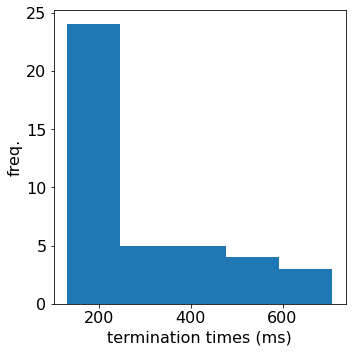

In [11]:
#plot the histogram of termination times
saving = True
fontsize=16

savefig_dir = f'{nb_dir}/Figures/birth_death_analysis'
savefig_fn = 'histogram_termination_times_lt_2.png'

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(termination_times, bins = 5)

#format plot
# plt.title(f'''termination times for 9 200x200 patches''', fontsize=fontsize)
ax.set_ylabel('freq.', fontsize=fontsize)
ax.set_xlabel('termination times (ms)', fontsize=fontsize)
ax.tick_params(axis='both', which='both', labelsize=fontsize)

if not saving: 
    plt.show() 
else:
    plt.tight_layout()
    os.chdir(savefig_dir)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}.")

In [12]:
from scipy.stats import poisson

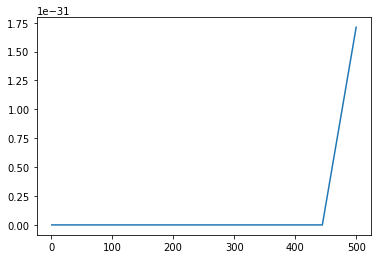

In [24]:
x_values = np.linspace(1,500,10)
# y_values = poisson(284).pmf(x_values)
pdf = lambda x: x^284
plt.plot(x_values,y_values)

In [21]:
dist.pmf(5)

7.043322813315152e-114

## visualize birth death rates

In [34]:
#import data
os.chdir(folder_name)
df = pd.read_csv(file_out)

#drop termination times
df.dropna(inplace=True)

#drop rows with rates over 100/ms
df = df.loc[df.rates<=100].copy()


dn_list = sorted(set(df.dn.values))
dn_list = [-2,2]

In [35]:
#compute median rates and IQR for the error bars corresponding to each category in dn_list
errorbar_data_list = []
for dn in dn_list:  
    #iterate over n for each dn
    df2 = df.loc[df.dn==dn].copy()
    n_list = sorted(set(df2.n.values))
    y_val_list = []
    y_err_1_list = []
    y_err_2_list = []
    for n in n_list:
        df3 = df2.loc[df2.n == n].copy()
        y_val, y_err_1, y_err_2 = df3.describe().T[['50%', '25%', '75%']].loc['rates'].values
        y_err_2 = float(y_err_2 - y_val)
        y_err_1 = float(y_val - y_err_1)
        y_val = float(y_val)
        y_val_list.append(y_val)
        y_err_1_list.append(y_err_1)
        y_err_2_list.append(y_err_2)
    # errorbar_data = (dn, n_list, y_val_list, y_err_1_list, y_err_2_list)
    errorbar_data = {'dn':dn, 
                     'n_list':n_list, 
                     'y_val_list':y_val_list, 
                     'y_err_1_list':y_err_1_list, 
                     'y_err_2_list':y_err_2_list
                    }
    errorbar_data_list.append(errorbar_data)    

In [36]:
#retrieve scatter plot data points for each category in dn_list
scatter_data_list = []
for dn in dn_list:  
    df2 = df.loc[df.dn==dn].copy()
    x_values = df2.n.values
    y_values = df2.rates.values
    scatter_data = {'dn':dn, 
                     'x_values':x_values, 
                     'y_values':y_values, 
                    }
    scatter_data_list.append(scatter_data)

In [37]:
#assign a color/label/other formatting to each category in dn_list
color_list_raw = ['red', 'blue', 'green', 'orange', 'brown', 'purple']
formatting_data_list = []
for i, dn in enumerate(dn_list):
    formatting_data = {
        'dn': dn,
        'color': color_list_raw[i],
        'label':f'$W_{{{int(dn):+d}}}$'
    }
    formatting_data_list.append(formatting_data)   

In [38]:
assert (len(formatting_data_list) is len(scatter_data_list ))
assert (len(formatting_data_list) is len(errorbar_data_list))

saved figure in 
	birth_death_rates.png.


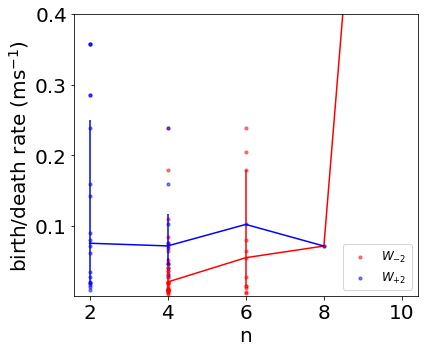

In [47]:
saving = True

savefig_dir = f'{nb_dir}/Figures/birth_death_analysis'
savefig_fn = 'birth_death_rates.png'
# savefig_fn = 'birth_death_rates_log.png'
log_scale = False
fontsize=20
figsize=(6,5)

# def birth_death_plot(*y_axis_struct_list):

# plot birth death rates with IQR y error bars with n on the x axis
fig, ax = plt.subplots(figsize=figsize)
for scatter_data, errorbar_data, formatting_data in zip(
    scatter_data_list, errorbar_data_list, formatting_data_list):

    dn, x_values, y_values = scatter_data.values()
    dn, n_list, y_val_list, y_err_1_list, y_err_2_list = errorbar_data.values()
    dn, color, label = formatting_data.values()
    yerr = np.array(list(zip(y_err_1_list,y_err_2_list))).T
    
    ax.scatter(x=x_values,y=y_values, c=color, s=10, alpha=0.5, label=label)
    ax.errorbar(n_list, y_val_list, yerr=yerr, c=color)
    
ax.legend()

# # ax.set_xticks(xticks)
# # ax.set_yticks([0,10,20,30,40,50])
# ymin, ymax = ax.get_ylim()
ax.set_ylim((1e-3,0.4))

ax.legend(loc='lower right', fontsize= fontsize-8)
ax.tick_params(axis='both', labelsize= fontsize)
ax.set_ylabel('birth/death rate (ms$^{-1}$)', fontsize=fontsize)
ax.set_xlabel('n', fontsize=fontsize) 
if log_scale:
    ax.set_yscale('log')
# ax.set_title(f'$\sigma = {sigma}$, threshold = {threshold}', fontsize=fontsize)
                    
# ax.set_title('high frequency birth deaths observed', fontsize=fontsize)
# ax.axis([20,60,0,7])
  
    
if not saving: 
    plt.show() 
else:
    plt.tight_layout()
    os.chdir(savefig_dir)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}.")


In [2]:
import trackpy
trackpy.link_iter?

In [3]:
import inspect

In [45]:
# print(inspect.getsource(trackpy.link_df))

In [ ]:
# Linker(search_range, **kwargs)
# logger.info("Frame {0}: {1} trajectories present.".format(t, len(linker.particle_ids)))

In [9]:
# import trackpy

In [42]:
196/9

21.77777777777778

In [43]:
21*9

189

In [44]:
22*9

198

In [1]:
from lib.birth_death_rates_from_ic import *
initial_condition_dir = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-1/ic-in/ic_200x200.121.33.npz'
birth_death_rates_from_ic(initial_condition_dir)

100000


KeyboardInterrupt: 